## NBA球星投篮分布图

这里简单以西弟...不对，是西帝！本·西蒙斯的3年NBA生涯投篮为例，从NBA官方获取西帝的所有投篮数据，每条数据都包含他的球员ID、全名、所在球队、投篮时在球场的相对位置、比赛时间等。这次暂时只简单描绘投篮分布图，利用相对位置信息就好了。
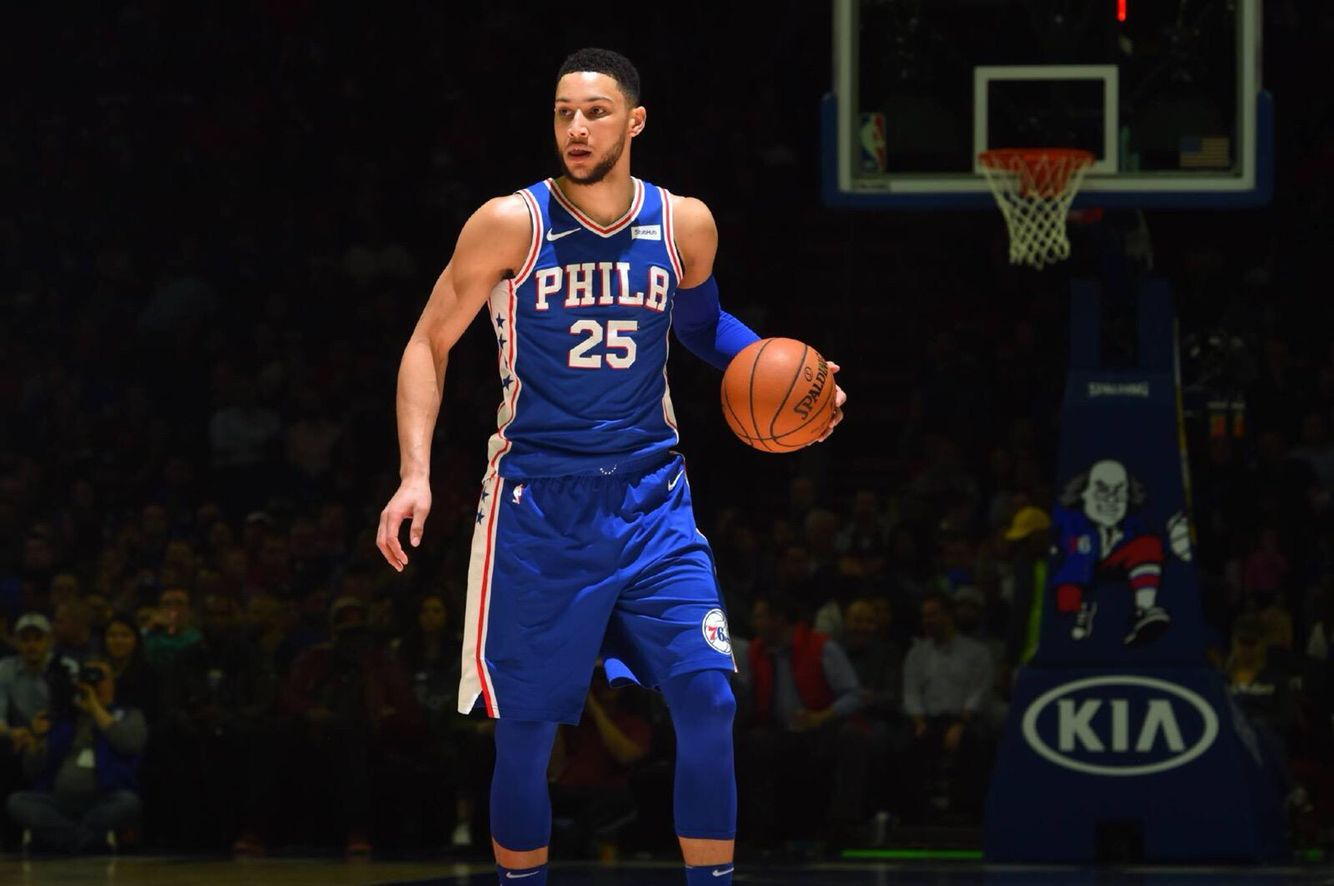

In [1]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage
import pandas as pd
import numpy as np
from nba_api.stats.endpoints import shotchartdetail
import nbacourt
import wordcloud as wc
import re
from PIL import Image

In [2]:
selected_player = shotchartdetail.ShotChartDetail(team_id=1610612755, player_id=1627732, context_measure_simple='FGA')

In [3]:
selected_player.shot_chart_detail.get_data_frame()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021700006,33,1627732,Ben Simmons,1610612755,Philadelphia 76ers,1,9,44,...,Center(C),Less Than 8 ft.,3,-18,26,1,0,20171018,WAS,PHI
1,Shot Chart Detail,0021700006,47,1627732,Ben Simmons,1610612755,Philadelphia 76ers,1,8,28,...,Center(C),Less Than 8 ft.,1,12,11,1,1,20171018,WAS,PHI
2,Shot Chart Detail,0021700006,77,1627732,Ben Simmons,1610612755,Philadelphia 76ers,1,5,54,...,Right Side(R),8-16 ft.,9,73,55,1,1,20171018,WAS,PHI
3,Shot Chart Detail,0021700006,182,1627732,Ben Simmons,1610612755,Philadelphia 76ers,2,11,43,...,Center(C),Less Than 8 ft.,0,0,-6,1,1,20171018,WAS,PHI
4,Shot Chart Detail,0021700006,187,1627732,Ben Simmons,1610612755,Philadelphia 76ers,2,10,42,...,Center(C),Less Than 8 ft.,0,8,1,1,1,20171018,WAS,PHI
5,Shot Chart Detail,0021700006,193,1627732,Ben Simmons,1610612755,Philadelphia 76ers,2,9,52,...,Center(C),Less Than 8 ft.,6,-33,59,1,0,20171018,WAS,PHI
6,Shot Chart Detail,0021700006,195,1627732,Ben Simmons,1610612755,Philadelphia 76ers,2,9,46,...,Center(C),Less Than 8 ft.,0,0,-6,1,0,20171018,WAS,PHI
7,Shot Chart Detail,0021700006,209,1627732,Ben Simmons,1610612755,Philadelphia 76ers,2,9,21,...,Center(C),8-16 ft.,12,-64,113,1,0,20171018,WAS,PHI
8,Shot Chart Detail,0021700006,318,1627732,Ben Simmons,1610612755,Philadelphia 76ers,2,1,52,...,Center(C),Less Than 8 ft.,2,-9,19,1,1,20171018,WAS,PHI
9,Shot Chart Detail,0021700006,348,1627732,Ben Simmons,1610612755,Philadelphia 76ers,3,11,17,...,Right Side(R),8-16 ft.,11,79,80,1,0,20171018,WAS,PHI


In [4]:
attempted = selected_player.shot_chart_detail.get_data_frame()

In [5]:
attempted['ACTION_TYPE'] = attempted['ACTION_TYPE'].str.replace(' ', '')

In [6]:
made = attempted[attempted['SHOT_MADE_FLAG'] == 1]

In [7]:
missed = attempted[attempted['SHOT_MADE_FLAG'] == 0]

In [8]:
made

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
1,Shot Chart Detail,0021700006,47,1627732,Ben Simmons,1610612755,Philadelphia 76ers,1,8,28,...,Center(C),Less Than 8 ft.,1,12,11,1,1,20171018,WAS,PHI
2,Shot Chart Detail,0021700006,77,1627732,Ben Simmons,1610612755,Philadelphia 76ers,1,5,54,...,Right Side(R),8-16 ft.,9,73,55,1,1,20171018,WAS,PHI
3,Shot Chart Detail,0021700006,182,1627732,Ben Simmons,1610612755,Philadelphia 76ers,2,11,43,...,Center(C),Less Than 8 ft.,0,0,-6,1,1,20171018,WAS,PHI
4,Shot Chart Detail,0021700006,187,1627732,Ben Simmons,1610612755,Philadelphia 76ers,2,10,42,...,Center(C),Less Than 8 ft.,0,8,1,1,1,20171018,WAS,PHI
8,Shot Chart Detail,0021700006,318,1627732,Ben Simmons,1610612755,Philadelphia 76ers,2,1,52,...,Center(C),Less Than 8 ft.,2,-9,19,1,1,20171018,WAS,PHI
10,Shot Chart Detail,0021700006,501,1627732,Ben Simmons,1610612755,Philadelphia 76ers,3,1,40,...,Center(C),Less Than 8 ft.,2,3,25,1,1,20171018,WAS,PHI
12,Shot Chart Detail,0021700006,626,1627732,Ben Simmons,1610612755,Philadelphia 76ers,4,6,15,...,Center(C),Less Than 8 ft.,1,13,10,1,1,20171018,WAS,PHI
15,Shot Chart Detail,0021700019,86,1627732,Ben Simmons,1610612755,Philadelphia 76ers,1,5,47,...,Center(C),Less Than 8 ft.,2,-19,17,1,1,20171020,PHI,BOS
17,Shot Chart Detail,0021700019,236,1627732,Ben Simmons,1610612755,Philadelphia 76ers,2,8,16,...,Center(C),Less Than 8 ft.,1,-14,5,1,1,20171020,PHI,BOS
19,Shot Chart Detail,0021700019,371,1627732,Ben Simmons,1610612755,Philadelphia 76ers,2,0,39,...,Center(C),Less Than 8 ft.,2,21,-9,1,1,20171020,PHI,BOS


In [9]:
missed

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021700006,33,1627732,Ben Simmons,1610612755,Philadelphia 76ers,1,9,44,...,Center(C),Less Than 8 ft.,3,-18,26,1,0,20171018,WAS,PHI
5,Shot Chart Detail,0021700006,193,1627732,Ben Simmons,1610612755,Philadelphia 76ers,2,9,52,...,Center(C),Less Than 8 ft.,6,-33,59,1,0,20171018,WAS,PHI
6,Shot Chart Detail,0021700006,195,1627732,Ben Simmons,1610612755,Philadelphia 76ers,2,9,46,...,Center(C),Less Than 8 ft.,0,0,-6,1,0,20171018,WAS,PHI
7,Shot Chart Detail,0021700006,209,1627732,Ben Simmons,1610612755,Philadelphia 76ers,2,9,21,...,Center(C),8-16 ft.,12,-64,113,1,0,20171018,WAS,PHI
9,Shot Chart Detail,0021700006,348,1627732,Ben Simmons,1610612755,Philadelphia 76ers,3,11,17,...,Right Side(R),8-16 ft.,11,79,80,1,0,20171018,WAS,PHI
11,Shot Chart Detail,0021700006,541,1627732,Ben Simmons,1610612755,Philadelphia 76ers,4,11,9,...,Center(C),8-16 ft.,11,-44,110,1,0,20171018,WAS,PHI
13,Shot Chart Detail,0021700006,630,1627732,Ben Simmons,1610612755,Philadelphia 76ers,4,5,34,...,Center(C),Less Than 8 ft.,2,6,22,1,0,20171018,WAS,PHI
14,Shot Chart Detail,0021700019,51,1627732,Ben Simmons,1610612755,Philadelphia 76ers,1,8,23,...,Center(C),8-16 ft.,9,11,90,1,0,20171020,PHI,BOS
16,Shot Chart Detail,0021700019,216,1627732,Ben Simmons,1610612755,Philadelphia 76ers,2,9,32,...,Center(C),Less Than 8 ft.,2,19,8,1,0,20171020,PHI,BOS
18,Shot Chart Detail,0021700019,264,1627732,Ben Simmons,1610612755,Philadelphia 76ers,2,6,13,...,Center(C),8-16 ft.,8,3,88,1,0,20171020,PHI,BOS


In [10]:
action_zh = attempted['ACTION_TYPE'].copy()

In [11]:
action_zh

0                        LayupShot
1          DrivingReverseLayupShot
2               TurnaroundHookShot
3                 PutbackLayupShot
4                  RunningDunkShot
5          DrivingFloatingJumpShot
6                     TipLayupShot
7               TurnaroundHookShot
8                        LayupShot
9          DrivingFloatingJumpShot
10                DrivingLayupShot
11                FloatingJumpshot
12                DrivingLayupShot
13                DrivingLayupShot
14              TurnaroundJumpShot
15                DrivingLayupShot
16                       LayupShot
17                       LayupShot
18                       LayupShot
19                ReverseLayupShot
20                DrivingLayupShot
21                       LayupShot
22                       LayupShot
23                       LayupShot
24                    TipLayupShot
25         DrivingReverseLayupShot
26                  PullupJumpshot
27                       LayupShot
28                Ru

In [12]:
action_zh = action_zh.str.replace('Shot', '', flags=re.IGNORECASE)

action_zh = action_zh.str.replace('Layup', '上篮', flags=re.IGNORECASE)

action_zh = action_zh.str.replace('Jump', '跳投', flags=re.IGNORECASE)

action_zh = action_zh.str.replace('Hook', '勾手', flags=re.IGNORECASE)

action_zh = action_zh.str.replace('Dunk', '扣篮', flags=re.IGNORECASE)

action_zh = action_zh.str.replace('Bank', '打板', flags=re.IGNORECASE)

action_zh = action_zh.str.replace('Fadeaway', '后仰', flags=re.IGNORECASE)

action_zh = action_zh.str.replace('Driving', '突破', flags=re.IGNORECASE)

action_zh = action_zh.str.replace('Turnaround', '转身', flags=re.IGNORECASE)

action_zh = action_zh.str.replace('Pullup', '拉杆', flags=re.IGNORECASE)

action_zh = action_zh.str.replace('Pull-up', '拉杆', flags=re.IGNORECASE)

action_zh = action_zh.str.replace('AlleyOop', '空接', flags=re.IGNORECASE)

action_zh = action_zh.str.replace('Cutting', '空切', flags=re.IGNORECASE)

action_zh = action_zh.str.replace('Running', '奔跑', flags=re.IGNORECASE)

action_zh = action_zh.str.replace('Reverse', '反身', flags=re.IGNORECASE)

action_zh = action_zh.str.replace('Putback', '补篮', flags=re.IGNORECASE)

action_zh = action_zh.str.replace('Floating', '高抛', flags=re.IGNORECASE)

action_zh = action_zh.str.replace('FingerRoll', '指尖', flags=re.IGNORECASE)

action_zh = action_zh.str.replace('Tip', '轻触', flags=re.IGNORECASE)

action_zh = action_zh.str.replace('StepBack', '后撤步', flags=re.IGNORECASE)

action_zh = action_zh.str.replace('Bank', '打板', flags=re.IGNORECASE)

In [13]:
action_zh.value_counts()

突破上篮        285
上篮          190
转身勾手        128
跳投          115
奔跑上篮        107
突破指尖上篮      103
拉杆跳投         89
突破扣篮         87
勾手           84
突破勾手         81
突破高抛跳投       80
转身跳投         75
扣篮           74
奔跑扣篮         74
突破反身上篮       67
轻触上篮         64
转身后仰         62
反身上篮         49
奔跑指尖上篮       46
空切上篮         44
高抛跳投         42
空切扣篮         38
空接扣篮         38
后仰跳投         35
空接上篮         29
突破高抛打板跳投     28
奔跑跳投         27
指尖上篮         19
轻触扣篮         18
补篮上篮         17
空切指尖上篮       16
后撤步跳投        13
补篮扣篮         13
奔跑反身上篮       12
转身打板勾手       10
跳投打板         10
反身扣篮          9
转身后仰打板跳投      7
突破打板勾手        6
勾手打板          6
奔跑空接扣篮        4
突破反身扣篮        4
奔跑空接上篮        4
后撤步打板跳投       3
奔跑拉杆跳投        2
奔跑反身扣篮        1
Name: ACTION_TYPE, dtype: int64

In [14]:
made['ACTION_TYPE'].value_counts()

DrivingLayupShot                  140
LayupShot                          93
DrivingDunkShot                    81
RunningDunkShot                    71
RunningLayupShot                   69
DunkShot                           67
DrivingFingerRollLayupShot         66
TurnaroundHookShot                 60
DrivingReverseLayupShot            43
HookShot                           38
CuttingDunkShot                    37
DrivingHookShot                    37
PullupJumpshot                     36
RunningFingerRollLayupShot         35
AlleyOopDunkShot                   34
CuttingLayupShot                   33
ReverseLayupShot                   33
TipLayupShot                       28
DrivingFloatingJumpShot            28
TurnaroundJumpShot                 24
TurnaroundFadeawayshot             22
AlleyOopLayupshot                  19
JumpShot                           19
DrivingFloatingBankJumpShot        18
FingerRollLayupShot                15
CuttingFingerRollLayupShot         14
PutbackLayup

     从前面的步骤获取到投篮数据之后，就可以开始可视化展示了。
     球场的描绘我觉得是这次比较困难的一点，不过网上有相关的球场描绘代码，嗯，参考一下。
 
     侃侃球吧，西帝在NBA赛场上给人的感觉像是当代魔术师约翰逊，组织能力强，技术细腻，借助出色的身体天赋能够终结大部分近距离得分，唯一被人诟病的就是中远距离投篮了。
     做这次投篮分布图也可以看出，西帝很擅长篮下三秒区的终结，近距离区域的命中率特别高，西帝的投篮随着离篮筐距离越远，命中率就越低，三分线外更加不用说了，有看球的朋友应该对西帝本赛季唯二投进的三分球印象比较深，此外就没有其它亮点可言了。都说西帝的出手选择比较聪明（也有球迷说西帝进攻欲望冷淡...怂得像个弟弟，所以才叫西弟），从直方图可以看出，西帝极少会选择三秒区以外出手，就算是罚球线踏前两三步左右的出手也不算多，结合看球分析的话，我估计通常应该是碰到大个子正面防守，西帝也很聪明地选择分球给空位队友完成终结了。总体统计，即便投篮能力一般，西帝生涯常规赛命中率也能达到55.5%，才华还是可以的。


In [15]:
attempted.SHOT_MADE_FLAG.mean()                         #可以算出总投篮命中率

0.5546436285097193

In [16]:
selected_player.league_averages.get_data_frame()

,GRID_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,FGA,FGM,FG_PCT
0,League Averages,Above the Break 3,Back Court(BC),Back Court Shot,2075,74,0.036
1,League Averages,Above the Break 3,Center(C),24+ ft.,177558,61105,0.344
2,League Averages,Above the Break 3,Left Side Center(LC),24+ ft.,296022,103373,0.349
3,League Averages,Above the Break 3,Right Side Center(RC),24+ ft.,290792,102679,0.353
4,League Averages,Backcourt,Back Court(BC),Back Court Shot,8808,233,0.026
5,League Averages,In The Paint (Non-RA),Center(C),8-16 ft.,147213,60493,0.411
6,League Averages,In The Paint (Non-RA),Center(C),Less Than 8 ft.,414034,161359,0.390
7,League Averages,In The Paint (Non-RA),Left Side(L),8-16 ft.,44797,17803,0.397
8,League Averages,In The Paint (Non-RA),Right Side(R),8-16 ft.,45646,17966,0.394
9,League Averages,Left Corner 3,Left Side(L),24+ ft.,137020,52655,0.384


In [17]:
attempted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2315 entries, 0 to 2314
Data columns (total 24 columns):
GRID_TYPE              2315 non-null object
GAME_ID                2315 non-null object
GAME_EVENT_ID          2315 non-null int64
PLAYER_ID              2315 non-null int64
PLAYER_NAME            2315 non-null object
TEAM_ID                2315 non-null int64
TEAM_NAME              2315 non-null object
PERIOD                 2315 non-null int64
MINUTES_REMAINING      2315 non-null int64
SECONDS_REMAINING      2315 non-null int64
EVENT_TYPE             2315 non-null object
ACTION_TYPE            2315 non-null object
SHOT_TYPE              2315 non-null object
SHOT_ZONE_BASIC        2315 non-null object
SHOT_ZONE_AREA         2315 non-null object
SHOT_ZONE_RANGE        2315 non-null object
SHOT_DISTANCE          2315 non-null int64
LOC_X                  2315 non-null int64
LOC_Y                  2315 non-null int64
SHOT_ATTEMPTED_FLAG    2315 non-null int64
SHOT_MADE_FLAG         

In [18]:
attempted.EVENT_TYPE.value_counts()

Made Shot      1284
Missed Shot    1031
Name: EVENT_TYPE, dtype: int64

([<matplotlib.patches.Wedge at 0x1f12cdea080>,
 [Text(-0.187909,1.08383,'Made Shot'), Text(0.187909,-1.08383,'Missed Shot')],
 [Text(-0.102496,0.591181,'55.46%'), Text(0.102496,-0.591181,'44.54%')])

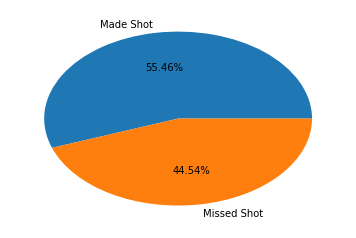

In [19]:
fig = plt.figure()
plt.pie(attempted.groupby('EVENT_TYPE').size().values, labels=attempted.groupby('EVENT_TYPE').size().index, autopct='%1.2f%%')

In [20]:
attempted.ACTION_TYPE.value_counts()

DrivingLayupShot                  285
LayupShot                         190
TurnaroundHookShot                128
JumpShot                          115
RunningLayupShot                  107
DrivingFingerRollLayupShot        103
PullupJumpshot                     89
DrivingDunkShot                    87
HookShot                           84
DrivingHookShot                    81
DrivingFloatingJumpShot            80
TurnaroundJumpShot                 75
DunkShot                           74
RunningDunkShot                    74
DrivingReverseLayupShot            67
TipLayupShot                       64
TurnaroundFadeawayshot             62
ReverseLayupShot                   49
RunningFingerRollLayupShot         46
CuttingLayupShot                   44
FloatingJumpshot                   42
AlleyOopDunkShot                   38
CuttingDunkShot                    38
FadeawayJumpShot                   35
AlleyOopLayupshot                  29
DrivingFloatingBankJumpShot        28
RunningJumpS

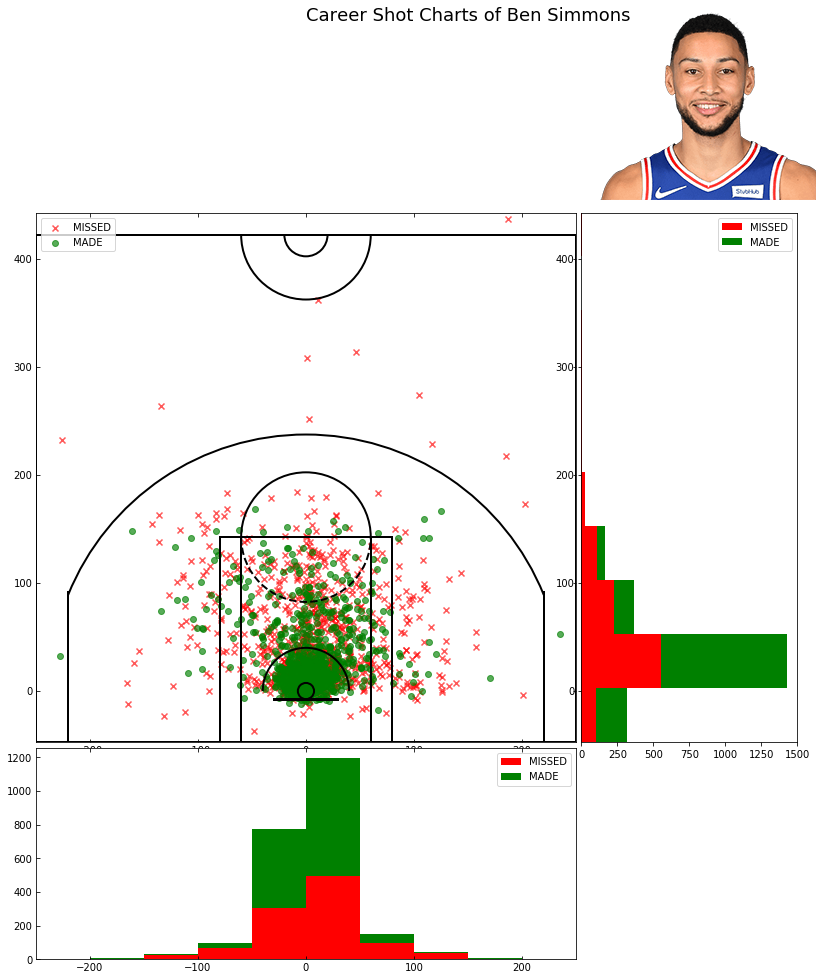

In [21]:
fig = plt.figure(figsize=(15, 14.7))
xbins = np.arange(-250, 300, 50)
ybins = np.arange(-47.5, 492.5, 50)

ax_scatter = plt.axes([0.1, 0.305, 0.5, 0.5])
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes([0.1, 0.1, 0.5, 0.2])
ax_histx.tick_params(direction='in', top=True)
ax_histy = plt.axes([0.605, 0.305, 0.2, 0.5])
nbacourt.draw_court(ax_scatter, outer_lines=True)
ax_scatter.set_xlim(-250, 250)
ax_scatter.set_ylim(-47.5, 442.5)
ax_scatter.scatter(missed.LOC_X, missed.LOC_Y, c='red', marker='x', alpha=0.65, label='MISSED')
ax_scatter.scatter(made.LOC_X, made.LOC_Y, c='green', marker='o', alpha=0.65, label='MADE')
ax_scatter.legend()
ax_histx.hist([missed.LOC_X, made.LOC_X], bins=xbins, range=(-250, 250), color=['red', 'green'], label=['MISSED', 'MADE'], stacked=True)
#ax_histx.hist(missed.LOC_X, bins=xbins, range=(-250, 250), color='red', label='MISSED', stacked=True)
#ax_histx.hist(made.LOC_X, bins=xbins, range=(-250, 250), color='green', label='MADE', stacked=True)
ax_histx.set_xlim(-250, 250)
ax_histx.legend()
ax_histy.hist([missed.LOC_Y, made.LOC_Y], bins=ybins, range=(-47.5, 442.5), color=['red', 'green'], label=['MISSED', 'MADE'], stacked=True, orientation='horizontal')
#ax_histy.hist(missed.LOC_Y, bins=ybins, range=(-47.5, 442.5), color='red', label='MISSED', stacked=True, orientation='horizontal')
#ax_histy.hist(made.LOC_Y, bins=ybins, range=(-47.5, 442.5), color='green', label='MADE', stacked=True, orientation='horizontal')
ax_histy.set_ylim(-47.5, 442.5)
ax_histy.legend()
portrait = plt.imread('https://ak-static.cms.nba.com/wp-content/uploads/headshots/nba/1610612755/2019/260x190/1627732.png')
plt.suptitle('Career Shot Charts of Ben Simmons', y=1, fontsize=18)
img = OffsetImage(portrait)
img.set_offset((580, 780))
fig.gca().add_artist(img)

最后是一个统计西蒙斯生涯的得分手段的词云图。当拿到NBA官方的投篮数据，不仅包括投篮位置点的坐标，还包括每次投篮的手段方式（接球方式、终结前的动作、终结方式，非常仔细）。我对数据进行了简单清洗，把空格删掉，甚至把官方的英文翻译成中文。最后生成词云图按照西帝的投篮照片。不难发现，很大部分完成得分的动作都是上篮，跳投次之，也有很多其他手段的得分，像空接、扣篮、勾手、打板投篮等。

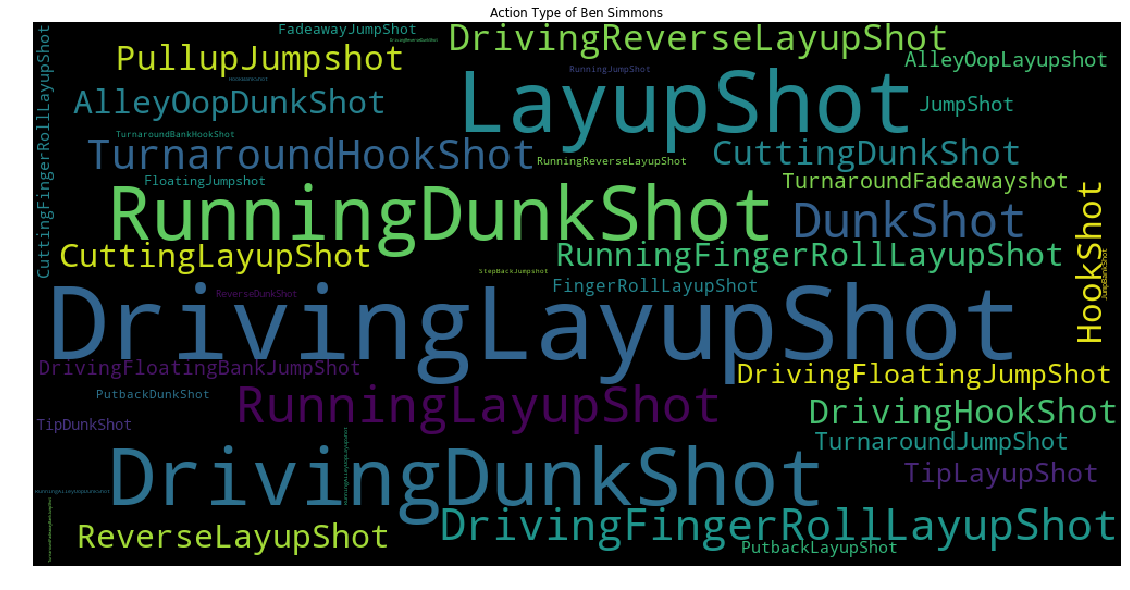

In [22]:
wc_action = wc.WordCloud(width=1000, height=500)
wc_action.generate(made['ACTION_TYPE'].str.cat(sep='|'))
plt.figure(figsize=(20, 10))
plt.imshow(wc_action)
plt.axis('off')
plt.title('Action Type of Ben Simmons')
plt.show()

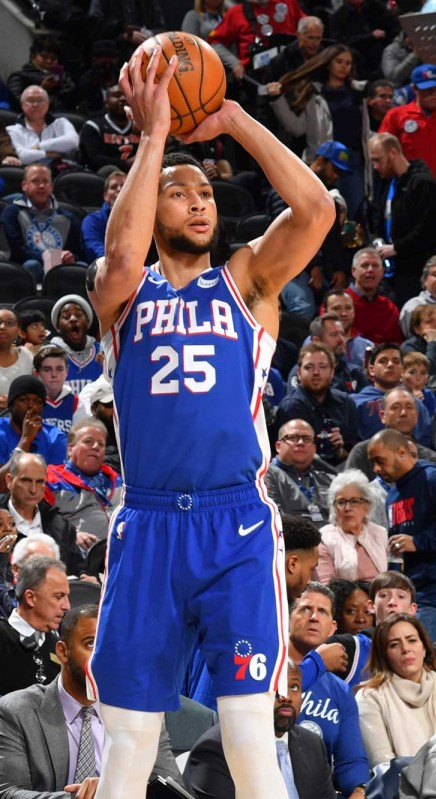
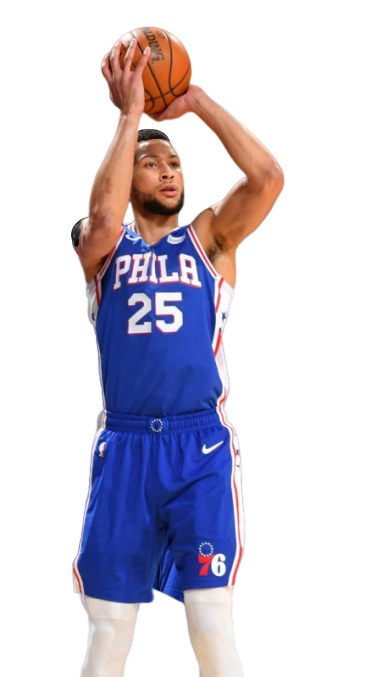
借助remove.bg来抠图，真心牛逼！

In [23]:
img = Image.open("simmons.png")
img = img.convert("RGBA")
r, g, b, a = img.split()
simmons_mask = 255 - np.array(a)

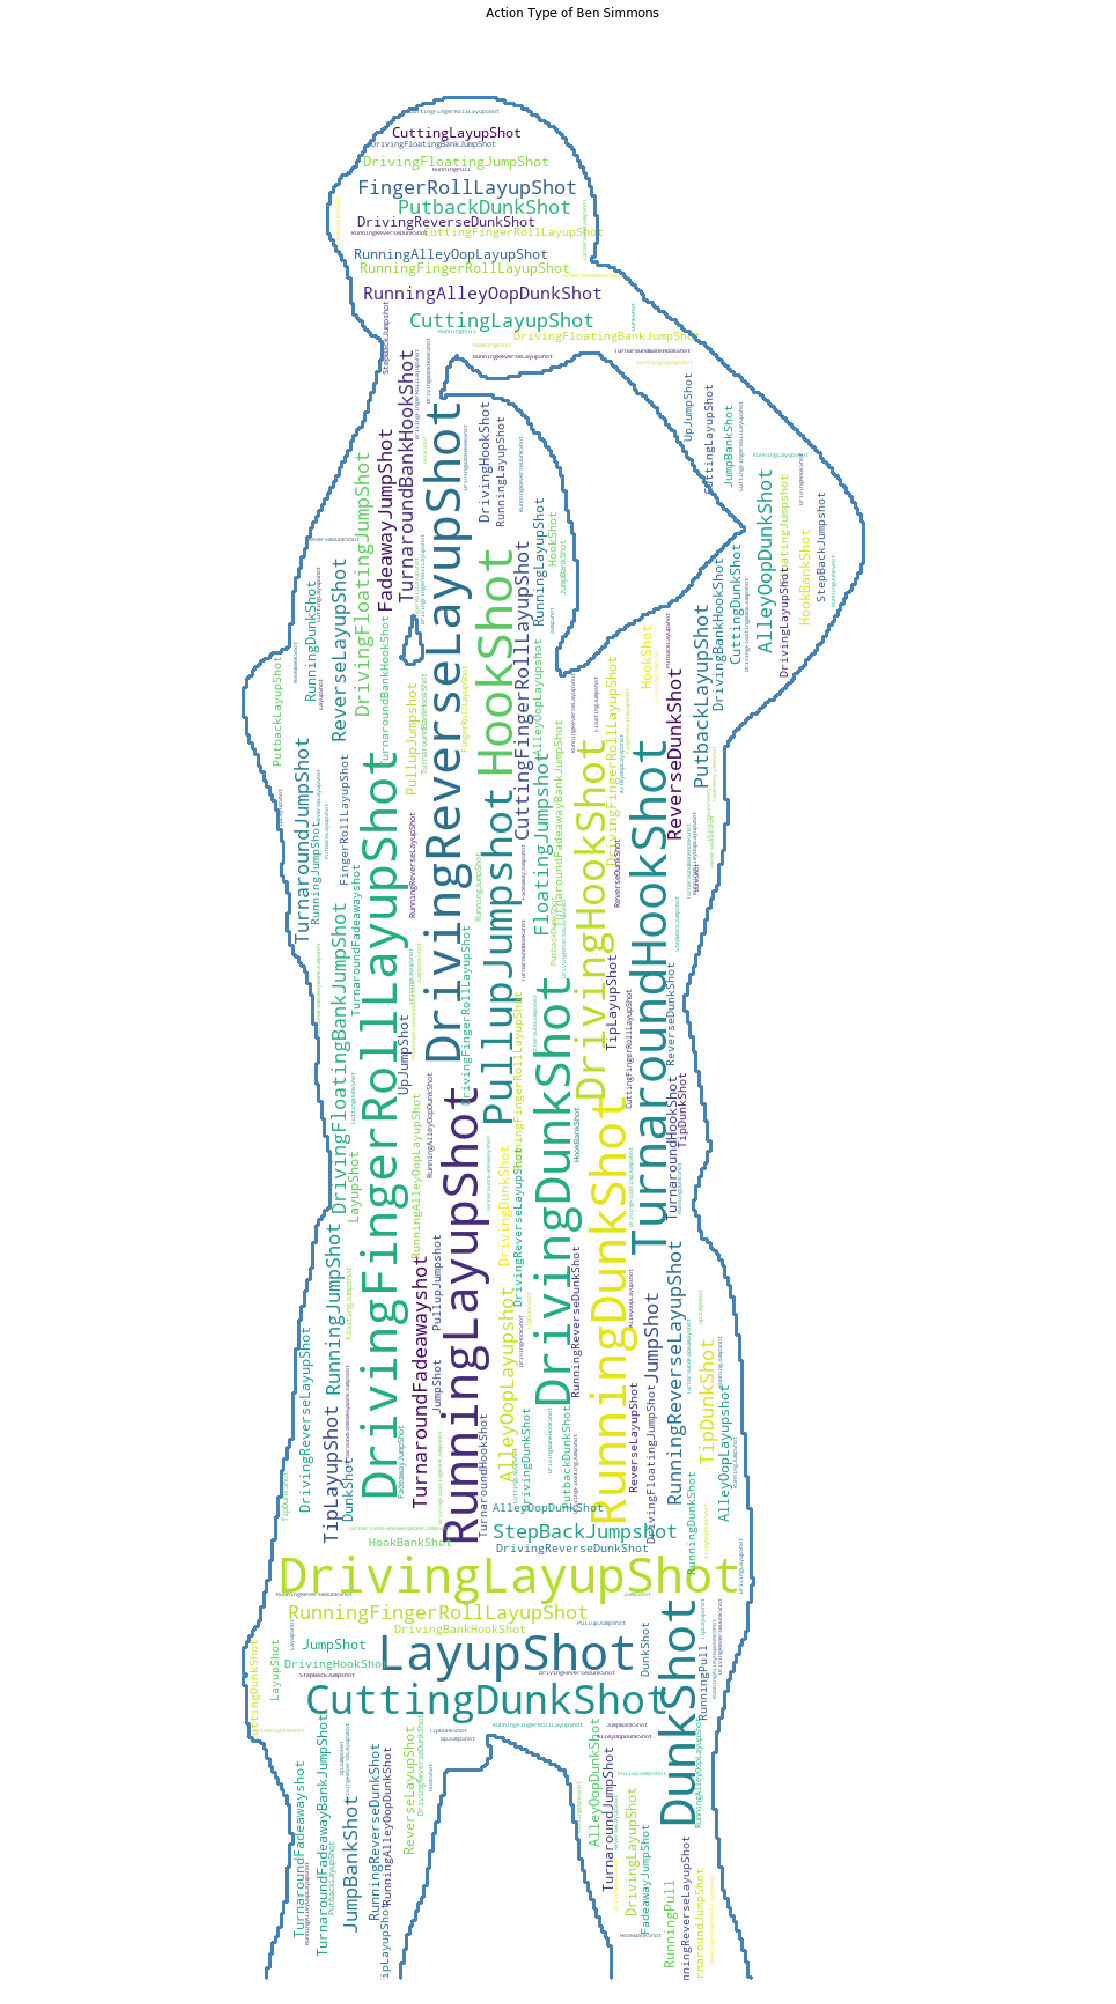

In [24]:
wc_action_masked = wc.WordCloud(mask=simmons_mask, scale=2.5, prefer_horizontal=0.2, min_font_size=1, background_color='white', contour_width=1.8, contour_color='steelblue', repeat=True)
wc_action_masked.generate(made['ACTION_TYPE'].str.cat(sep='|'))
plt.figure(figsize=(64, 36))
plt.imshow(wc_action_masked)
plt.axis('off')
plt.title('Action Type of Ben Simmons')
plt.show()

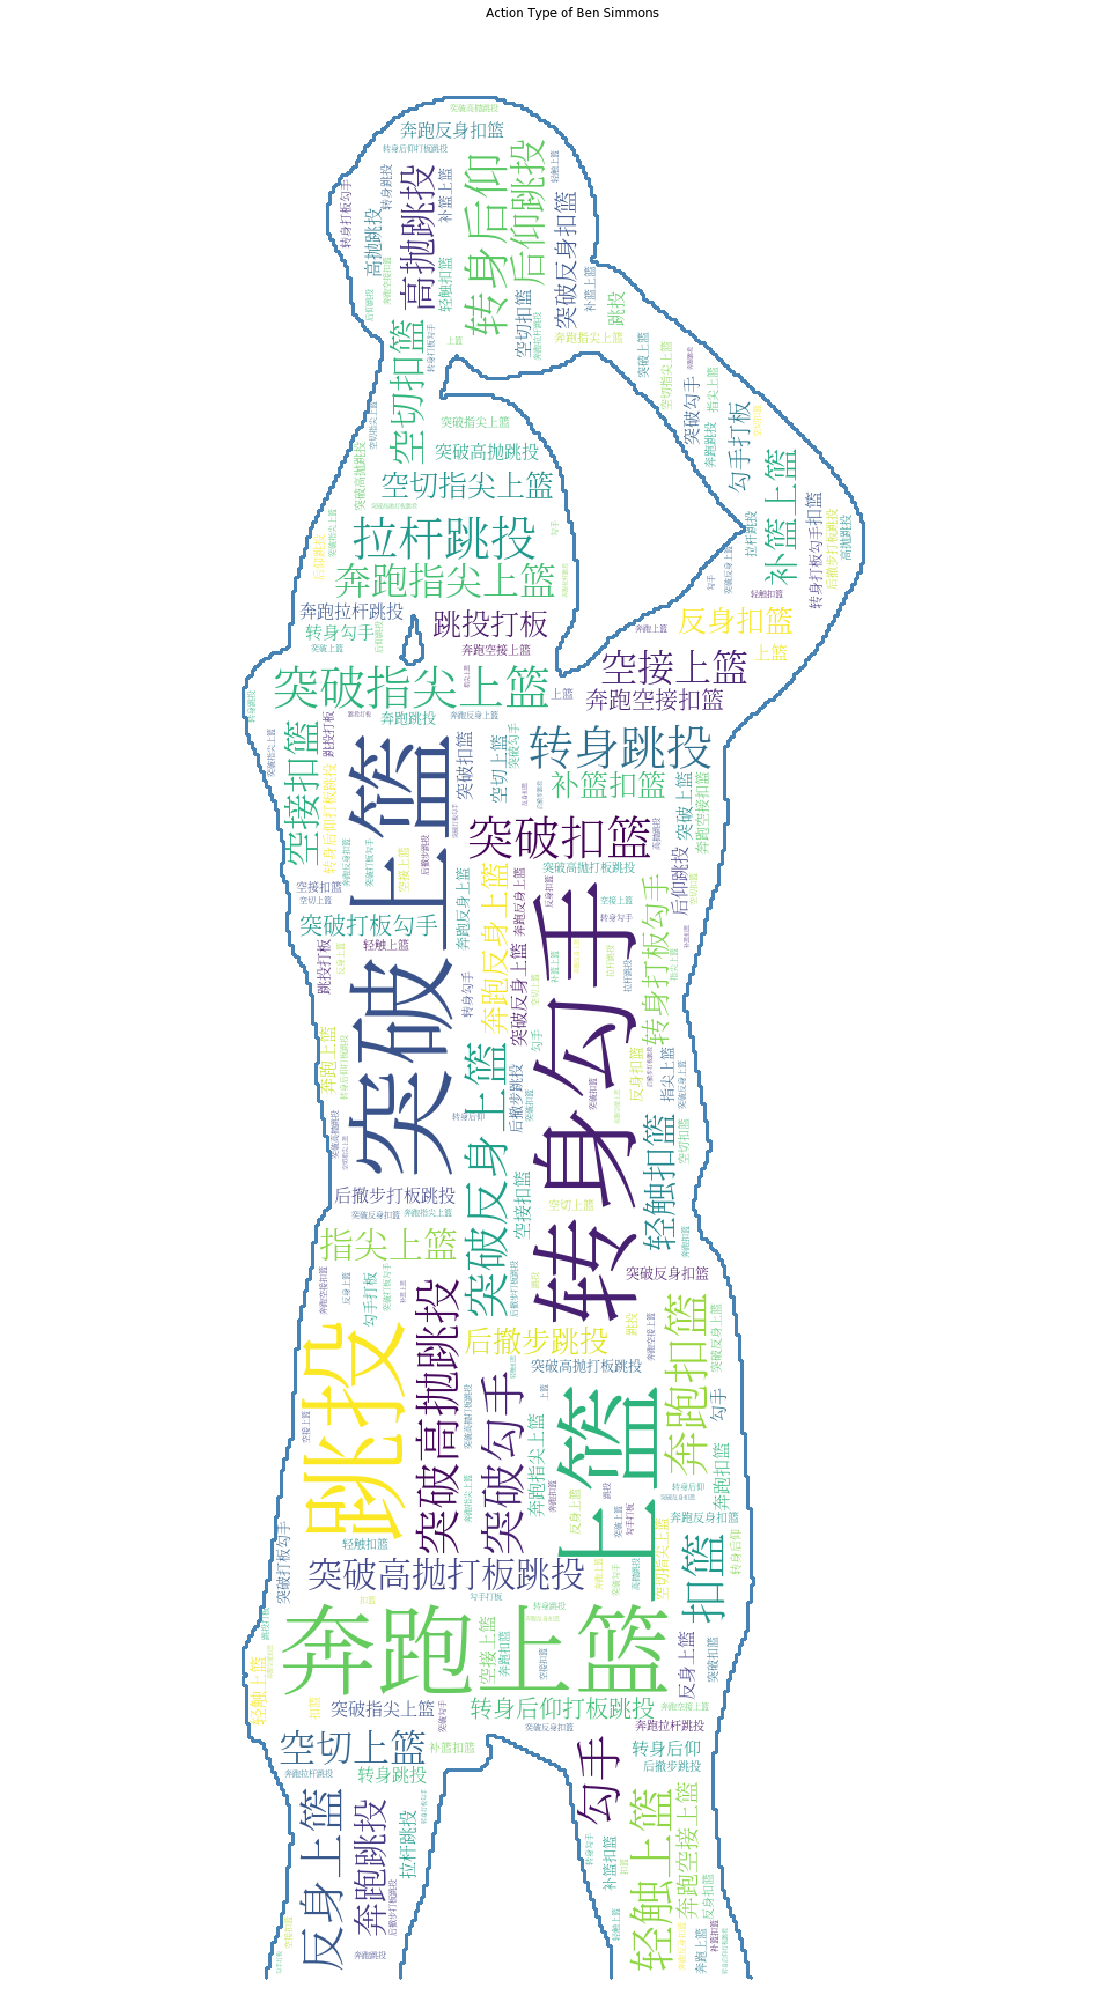

In [25]:
wc_action_zh = wc.WordCloud(font_path='SourceHanSerifK-Light.otf', mask=simmons_mask, prefer_horizontal=0.2, scale=2.5, min_font_size=1, background_color='white', contour_width=1.8, contour_color='steelblue', repeat=True)
wc_action_zh.generate(action_zh.str.cat(sep='|'))
plt.figure(figsize=(64, 36))
plt.imshow(wc_action_zh)
plt.axis('off')
plt.title('Action Type of Ben Simmons')
plt.show()